# CLUSTERING THE MILITARY POWERS OF COUNTRIES

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("World military power.xlsx")

In [3]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,A

In [4]:
df.columns = df.iloc[0] # birinci satırı kolon ismi yaptık
df = df[1:]
df.columns = df.columns.str.replace(" ", "")
df = df.rename(columns={"MilitaryStrength": "countries"})


In [5]:
df.shape

(138, 60)

In [6]:
silinecek_kolonlar = [kolon for i, kolon in enumerate(df.columns) if i > 0 and i % 2 != 1] #tek sayılı sutunları sildik 1. hariç
df = df.drop(silinecek_kolonlar, axis=1)

In [7]:
df.head()

,countries,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalCoastlineCoveragevalue,TotalWaterwayCoveragevalue,TotalBorderCoveragevalue
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
5,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968


In [8]:
df

,countries,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalCoastlineCoveragevalue,TotalWaterwayCoveragevalue,TotalBorderCoveragevalue
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
5,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,260,38,0,52,82,86,10,390,600,73,104,36,49,0,2,0,4,"74,50,00,000","1,00,30,00,00,000",444,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800,7100,5267
135,Vietnam,0.3559,293,77,0,38,36,138,25,2615,2530,70,1000,85,65,0,6,0,9,"5,50,00,00,000","96,58,00,00,000",45,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444,17702,4616
136,Yemen,1.2412,169,77,0,8,21,61,14,620,615,20,85,150,30,0,0,0,0,"1,40,00,00,000","7,06,80,00,000",57,12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0,1601
137,Zambia,1.6464,108,18,0,11,52,27,0,75,184,0,42,50,0,0,0,0,0,"4,00,00,000","11,66,00,00,000",88,0,21000,0,"61,66,905","1,64,45,079","7,52,618",NaN,2250,6043


In [9]:
df.shape

(138, 31)

In [10]:
df.tail()

,countries,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalCoastlineCoveragevalue,TotalWaterwayCoveragevalue,TotalBorderCoveragevalue
134,Venezuela,0.6449,260,38,0,52,82,86,10,390,600,73,104,36,49,0,2,0,4,"74,50,00,000","1,00,30,00,00,000",444,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800,7100,5267
135,Vietnam,0.3559,293,77,0,38,36,138,25,2615,2530,70,1000,85,65,0,6,0,9,"5,50,00,00,000","96,58,00,00,000",45,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444,17702,4616
136,Yemen,1.2412,169,77,0,8,21,61,14,620,615,20,85,150,30,0,0,0,0,"1,40,00,00,000","7,06,80,00,000",57,12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0,1601
137,Zambia,1.6464,108,18,0,11,52,27,0,75,184,0,42,50,0,0,0,0,0,"4,00,00,000","11,66,00,00,000",88,0,21000,0,"61,66,905","1,64,45,079","7,52,618",NaN,2250,6043
138,Zimbabwe,1.7577,90,10,0,14,38,28,6,42,300,0,65,22,0,0,0,0,0,"10,00,00,000","9,35,70,00,000",196,0,19500,0,"55,84,086","1,40,30,368","3,90,757",NaN,0,3229


In [11]:
df.isnull().sum()

0
countries                                0
MilitaryStrengthPowerIndex               0
AircraftStrengthvalue                    0
Fighter/InterceptorStrengthvalue         0
AttackAircraftStrengthvalue              0
TransportAircraftFleetStrengthvalue      0
TrainerAircraftFleetvalue                0
HelicopterFleetStrengthvalue             0
AttackHelicopterFleetStrengthvalue       0
TankStrengthvalue                        0
AFV/APCStrengthvalue                     0
Self-PropelledArtilleryStrengthvalue     0
TowedArtilleryStrengthvalue              0
RocketProjectorStrengthvalue             0
NavyFleetStrengthsvalue                 14
AircraftCarrierFleetStrengthvalue       23
SubmarineFleetStrengthvalue             23
DestroyerFleetStrengthvalue             23
FrigateFleetStrengthvalue               23
defensespendingbudgetvalue               0
ExternalDebtvalue                        0
AirportTotalsvalue                       0
OilProductionvalue                       0
OilConsum

In [12]:
df.describe()



,countries,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalCoastlineCoveragevalue,TotalWaterwayCoveragevalue,TotalBorderCoveragevalue
count,138,138.0000,138,138,138,138,138,138,138,138,138,138,138,138,124,115,115,115,115,138,138,138,138,138,138,138,138,138,109,138,129
unique,138,138.0000,113,63,38,49,77,97,45,106,130,70,91,68,78,5,20,11,18,124,138,108,88,102,84,138,138,138,104,92,125
top,Afghanistan,1.3444,19,0,0,0,0,5,0,0,2000,0,0,0,0,0,0,0,0,"2,50,00,00,000","2,84,00,00,000",18,0,18500,0,"1,43,25,743","3,49,40,837","6,52,230",853,0,443
freq,1,1.0000,5,46,75,15,25,4,63,24,4,52,24,46,14,102,74,103,61,3,1,3,46,4,46,1,1,1,2,38,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   countries                             138 non-null    object
 1   MilitaryStrengthPowerIndex            138 non-null    object
 2   AircraftStrengthvalue                 138 non-null    object
 3   Fighter/InterceptorStrengthvalue      138 non-null    object
 4   AttackAircraftStrengthvalue           138 non-null    object
 5   TransportAircraftFleetStrengthvalue   138 non-null    object
 6   TrainerAircraftFleetvalue             138 non-null    object
 7   HelicopterFleetStrengthvalue          138 non-null    object
 8   AttackHelicopterFleetStrengthvalue    138 non-null    object
 9   TankStrengthvalue                     138 non-null    object
 10  AFV/APCStrengthvalue                  138 non-null    object
 11  Self-PropelledArtilleryStrengthv

In [14]:
sayi_harici_veri_sayisi = df.apply(lambda x: x[pd.to_numeric(x, errors='coerce').isna()].count())

print(sayi_harici_veri_sayisi)

0
countries                               138
MilitaryStrengthPowerIndex                0
AircraftStrengthvalue                     0
Fighter/InterceptorStrengthvalue          0
AttackAircraftStrengthvalue               0
TransportAircraftFleetStrengthvalue       0
TrainerAircraftFleetvalue                 0
HelicopterFleetStrengthvalue              0
AttackHelicopterFleetStrengthvalue        0
TankStrengthvalue                         0
AFV/APCStrengthvalue                      0
Self-PropelledArtilleryStrengthvalue      0
TowedArtilleryStrengthvalue               0
RocketProjectorStrengthvalue              0
NavyFleetStrengthsvalue                   0
AircraftCarrierFleetStrengthvalue         0
SubmarineFleetStrengthvalue               0
DestroyerFleetStrengthvalue               0
FrigateFleetStrengthvalue                 0
defensespendingbudgetvalue              138
ExternalDebtvalue                       138
AirportTotalsvalue                        0
OilProductionvalue            

In [15]:
df1 = df.iloc[:, 0].to_frame()

In [16]:
df2 = df.drop(df.columns[0], axis=1)

In [17]:
df2 = df2.applymap(lambda x: x.replace(",", "") if isinstance(x, str) else x)
df2 = df2.astype(float)

In [18]:
df2.head()

,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalCoastlineCoveragevalue,TotalWaterwayCoveragevalue,TotalBorderCoveragevalue
1,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
2,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
3,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
4,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
5,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [19]:
df = pd.concat([df1, df2], axis=1)

In [20]:
df.head()

,countries,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalCoastlineCoveragevalue,TotalWaterwayCoveragevalue,TotalBorderCoveragevalue
1,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
2,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
3,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
4,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
5,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   countries                             138 non-null    object 
 1   MilitaryStrengthPowerIndex            138 non-null    float64
 2   AircraftStrengthvalue                 138 non-null    float64
 3   Fighter/InterceptorStrengthvalue      138 non-null    float64
 4   AttackAircraftStrengthvalue           138 non-null    float64
 5   TransportAircraftFleetStrengthvalue   138 non-null    float64
 6   TrainerAircraftFleetvalue             138 non-null    float64
 7   HelicopterFleetStrengthvalue          138 non-null    float64
 8   AttackHelicopterFleetStrengthvalue    138 non-null    float64
 9   TankStrengthvalue                     138 non-null    float64
 10  AFV/APCStrengthvalue                  138 non-null    float64
 11  Self-PropelledArtil

In [22]:
df.isnull().sum()

countries                                0
MilitaryStrengthPowerIndex               0
AircraftStrengthvalue                    0
Fighter/InterceptorStrengthvalue         0
AttackAircraftStrengthvalue              0
TransportAircraftFleetStrengthvalue      0
TrainerAircraftFleetvalue                0
HelicopterFleetStrengthvalue             0
AttackHelicopterFleetStrengthvalue       0
TankStrengthvalue                        0
AFV/APCStrengthvalue                     0
Self-PropelledArtilleryStrengthvalue     0
TowedArtilleryStrengthvalue              0
RocketProjectorStrengthvalue             0
NavyFleetStrengthsvalue                 14
AircraftCarrierFleetStrengthvalue       23
SubmarineFleetStrengthvalue             23
DestroyerFleetStrengthvalue             23
FrigateFleetStrengthvalue               23
defensespendingbudgetvalue               0
ExternalDebtvalue                        0
AirportTotalsvalue                       0
OilProductionvalue                       0
OilConsumpt

In [23]:
df = df.fillna(0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   countries                             138 non-null    object 
 1   MilitaryStrengthPowerIndex            138 non-null    float64
 2   AircraftStrengthvalue                 138 non-null    float64
 3   Fighter/InterceptorStrengthvalue      138 non-null    float64
 4   AttackAircraftStrengthvalue           138 non-null    float64
 5   TransportAircraftFleetStrengthvalue   138 non-null    float64
 6   TrainerAircraftFleetvalue             138 non-null    float64
 7   HelicopterFleetStrengthvalue          138 non-null    float64
 8   AttackHelicopterFleetStrengthvalue    138 non-null    float64
 9   TankStrengthvalue                     138 non-null    float64
 10  AFV/APCStrengthvalue                  138 non-null    float64
 11  Self-PropelledArtil

In [25]:
df.isnull().sum()

countries                               0
MilitaryStrengthPowerIndex              0
AircraftStrengthvalue                   0
Fighter/InterceptorStrengthvalue        0
AttackAircraftStrengthvalue             0
TransportAircraftFleetStrengthvalue     0
TrainerAircraftFleetvalue               0
HelicopterFleetStrengthvalue            0
AttackHelicopterFleetStrengthvalue      0
TankStrengthvalue                       0
AFV/APCStrengthvalue                    0
Self-PropelledArtilleryStrengthvalue    0
TowedArtilleryStrengthvalue             0
RocketProjectorStrengthvalue            0
NavyFleetStrengthsvalue                 0
AircraftCarrierFleetStrengthvalue       0
SubmarineFleetStrengthvalue             0
DestroyerFleetStrengthvalue             0
FrigateFleetStrengthvalue               0
defensespendingbudgetvalue              0
ExternalDebtvalue                       0
AirportTotalsvalue                      0
OilProductionvalue                      0
OilConsumptionvalue               

In [26]:
x=df[[
    
    "MilitaryStrengthPowerIndex","AircraftStrengthvalue", "Fighter/InterceptorStrengthvalue",
 "AttackAircraftStrengthvalue", "TransportAircraftFleetStrengthvalue","TrainerAircraftFleetvalue",
  "HelicopterFleetStrengthvalue", "AttackHelicopterFleetStrengthvalue", "TankStrengthvalue",
   "AFV/APCStrengthvalue", "Self-PropelledArtilleryStrengthvalue","TowedArtilleryStrengthvalue",
    "RocketProjectorStrengthvalue","NavyFleetStrengthsvalue","AircraftCarrierFleetStrengthvalue",
    "SubmarineFleetStrengthvalue", "DestroyerFleetStrengthvalue","FrigateFleetStrengthvalue",
    "defensespendingbudgetvalue",
    "ExternalDebtvalue","AirportTotalsvalue","OilProductionvalue",
    "OilConsumptionvalue", "ProvenOilReservesvalue","AvailableManpowervalue","TotalPopulationvalue",
    "TotalSquareLandAreavalue","TotalCoastlineCoveragevalue", "TotalWaterwayCoveragevalue",
    "TotalBorderCoveragevalue"
   
   ]]


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
model=KMeans(4)

In [29]:
model=model.fit(x)

In [30]:
tahmin=model.predict(x)

In [31]:
x["cluster"]=tahmin

In [32]:
silhouette_score(x,tahmin)

0.8671436271439987

In [33]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_  
        print("Cluster", i, "score", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [34]:
clust(10)

Cluster 2 score 0.9227153206136329
Cluster 3 score 0.8995442950361631
Cluster 4 score 0.8671436271439987
Cluster 5 score 0.8675195540746111
Cluster 6 score 0.7746953343547783
Cluster 7 score 0.7817947546427708
Cluster 8 score 0.7847423623940265
Cluster 9 score 0.6833747949746692
Cluster 10 score 0.6795886784648338


In [35]:
x["cluster"].value_counts()

0    124
3      9
2      4
1      1
Name: cluster, dtype: int64

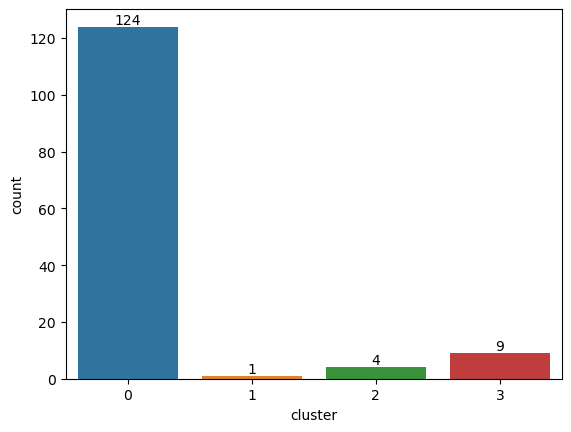

In [36]:
ax=sns.countplot(x=x["cluster"])
ax.bar_label(ax.containers[0]);

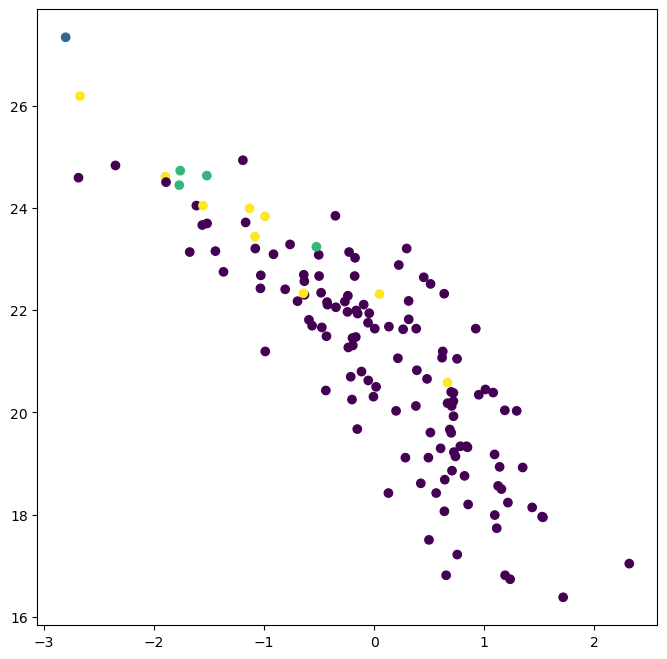

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(np.log(x.MilitaryStrengthPowerIndex), np.log(x.defensespendingbudgetvalue), c=tahmin);

In [38]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [39]:
link_data=linkage(x,method="ward", metric="euclidean")

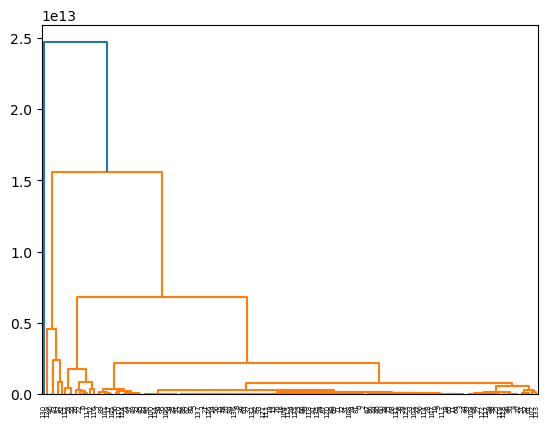

In [40]:
dendrogram(link_data)
plt.show()

In [56]:
from sklearn.cluster import DBSCAN

In [57]:
clusters=DBSCAN(eps=2.5,min_samples=4).fit(x)

In [58]:
labels=model.labels_

In [59]:
from sklearn import metrics

In [60]:
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[clusters.core_sample_indices_]=True



In [61]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)



print(metrics.silhouette_score(x,labels))

0.8671436271439987


In [62]:
x["countries"]=df["countries"]

In [63]:
x[x["cluster"]==1]

,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,NavyFleetStrengthsvalue,AircraftCarrierFleetStrengthvalue,SubmarineFleetStrengthvalue,DestroyerFleetStrengthvalue,FrigateFleetStrengthvalue,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalCoastlineCoveragevalue,TotalWaterwayCoveragevalue,TotalBorderCoveragevalue,cluster,countries
131,0.0606,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,39253.0,1465.0,2740.0,1366.0,490.0,20.0,66.0,91.0,0.0,7.500000e+11,1.791000e+13,13513.0,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,9826675.0,19924.0,41009.0,12048.0,1,United States


In [64]:
x.groupby("cluster")["countries"].unique()

cluster
0    [Afghanistan, Albania, Algeria, Angola, Argent...
1                                      [United States]
2       [France, Germany, Netherlands, United Kingdom]
3    [Australia, Belgium, Canada, China, Ireland, I...
Name: countries, dtype: object